In [ ]:
# Boosting

# Gradient Boost

# GB-Classifier

In [1]:
import pandas as pd

df = pd.read_csv('Travel.csv')

In [3]:
X = df.drop(['ProdTaken','CustomerID'],axis=1)
y = df['ProdTaken']

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [5]:
cat_feats = X_train.select_dtypes(include='object').columns
num_feats = X_train.select_dtypes(include=['int','float']).columns

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
        ('num', num_transformer, num_feats),
        ('cat', cat_transformer, cat_feats)
    ])

# Create the full model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('GB-Class', GradientBoostingClassifier(random_state=42))
])

In [21]:
model_pipeline.fit(X_train,y_train)

y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:,1]

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

auc_score = roc_auc_score(y_test,y_proba)

print(f'accuracy_score = {accuracy}')
print(f'confusion_matrix = {cm}')
print(f'classification report =\n {report}')

accuracy_score = 0.8629856850715747
confusion_matrix = [[1156   35]
 [ 166  110]]
classification report =
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1191
           1       0.76      0.40      0.52       276

    accuracy                           0.86      1467
   macro avg       0.82      0.68      0.72      1467
weighted avg       0.85      0.86      0.85      1467



In [23]:
import warnings as w;w.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

params = {
    'GB-Class__loss':['log_loss','deviance','exponential'],
    'GB-Class__criterion':['friedman_mse','squared_error','mse'],
    'GB-Class__min_samples_split':[2,8,15,20],
    'GB-Class__n_estimators':[100,200,300,500],
    'GB-Class__max_depth':[5,8,12,15,None,10]
}

randomcv = RandomizedSearchCV(model_pipeline,param_distributions=params,cv=3,n_iter=100)

randomcv.fit(X_train,y_train)

y_pred_ = randomcv.predict(X_test)
y_proba_ = randomcv.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(f'accuracy_score = {accuracy}')
print(f'confusion_matrix = {cm}')
print(f'classification report =\n {report}')

accuracy_score = 0.8629856850715747
confusion_matrix = [[1156   35]
 [ 166  110]]
classification report =
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1191
           1       0.76      0.40      0.52       276

    accuracy                           0.86      1467
   macro avg       0.82      0.68      0.72      1467
weighted avg       0.85      0.86      0.85      1467



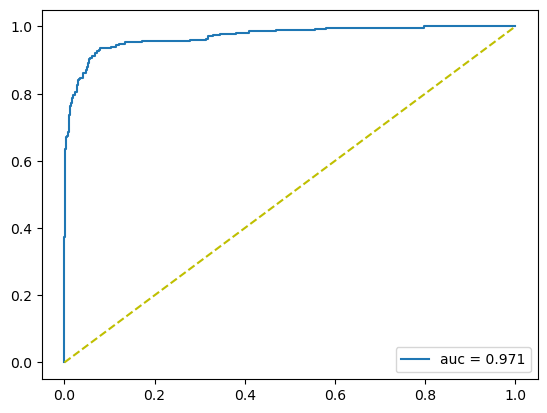

In [25]:
import matplotlib.pyplot as plt

auc_score = roc_auc_score(y_test,y_proba_)
fpr,tpr,threshold = roc_curve (y_test,y_proba_)

plt.plot(fpr,tpr,label=f'auc = {auc_score:.3f}')
plt.plot([0,1],[0,1],'y--')
plt.legend()
plt.show()